In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Ustawienia wykresów Seaborn
sns.set(style="whitegrid")

In [ ]:
# 1. Wczytanie danych z przykładowego pliku CSV (wzrost, waga)

df = pd.read_csv("height_weight_age_gender_sample.csv")


In [ ]:
df.head(3)

,height,weight,age,gender
0,187.640523,74.592789,50,F
1,174.001572,69.589093,56,M
2,179.787380,83.156162,49,F


In [ ]:
# 2. Przetwarzanie danych
# Wstępne statystyki opisowe
print("Podstawowe statystyki opisowe:")
print(df.describe())

Podstawowe statystyki opisowe:
           height      weight         age
count  500.000000  500.000000  500.000000
mean   169.746456   69.218092   38.402000
std      9.991564   11.716243   12.169824
min    142.274072   33.446283   18.000000
25%    163.098252   61.445315   28.000000
50%    169.518462   69.193541   38.000000
75%    176.678610   76.125272   48.000000
max    196.962241  103.112261   59.000000


In [ ]:
df['bmi']=df['weight']/(df['height']/100)**2

In [ ]:
def calculate_ppm(row):
  if row['gender'] == 'M':
    return 88.362 + (13.397 * row['bmi']) + (4.799 * row['height']) - (5.677 * row['weight'])
  else:
    return 447.593 + (9.247 * row['bmi']) + (3.098 * row['height']) - (4.330 * row['weight'])

df['ppm'] = df.apply(calculate_ppm, axis=1)

In [ ]:
df['ppm'].head(3)

,ppm
0,901.821074
1,836.261448
2,882.398505


In [ ]:
# 3. Analiza statystyczna z wykorzystaniem SciPy
# Wyliczamy korelację między wzrostem a wagą
correlation, p_value = stats.pearsonr(df['height'], df['weight'])
print(f"Korelacja między wzrostem a wagą: {correlation:.2f}, wartość p: {p_value:.2e}")


Korelacja między wzrostem a wagą: -0.04, wartość p: 3.63e-01


In [ ]:
# 4. Tworzenie modelu regresji liniowej
# Dopasowanie modelu liniowego
slope, intercept, r_value, p_value, std_err = stats.linregress(df['height'], df['weight'])

In [ ]:
# Funkcja liniowa do predykcji
def predict(weight):
    return slope * weight + intercept

# Predykcja wag na podstawie wzrostu
df['predicted_weight'] = predict(df['height'])


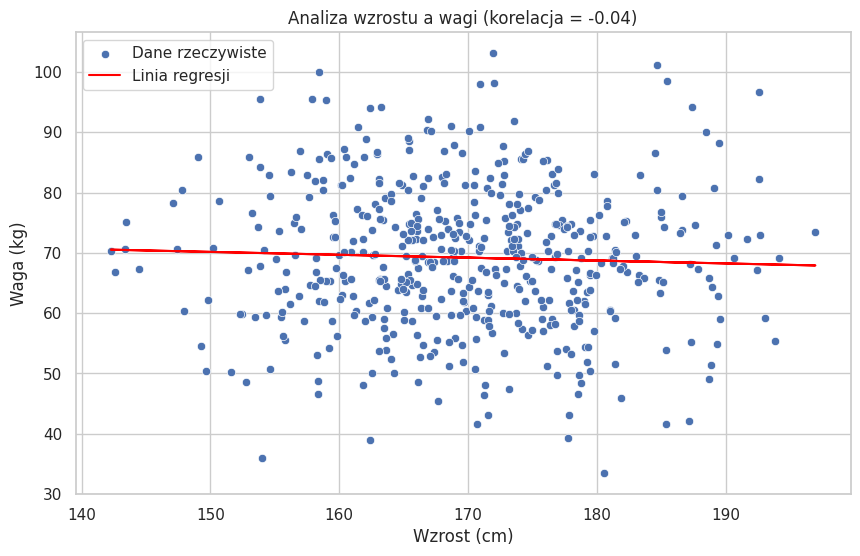

In [ ]:
# 5. Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Wykres punktowy wzrost-waga
sns.scatterplot(data=df, x='height', y='weight', label="Dane rzeczywiste")

# Dodanie linii regresji
plt.plot(df['height'], df['predicted_weight'], color="red", label="Linia regresji")

# Tytuł i etykiety osi
plt.title(f"Analiza wzrostu a wagi (korelacja = {correlation:.2f})")
plt.xlabel("Wzrost (cm)")
plt.ylabel("Waga (kg)")
plt.legend()

plt.show()

In [ ]:
print(df[['weight','weight','age','gender','bmi','ppm']])

        weight     weight  age gender        bmi         ppm
0    74.592789  74.592789   50      F  21.185737  901.821074
1    69.589093  69.589093   56      M  22.984488  836.261448
2    83.156162  83.156162   49      F  25.726223  882.398505
3    67.189410  67.189410   40      M  18.148903  873.439031
4    65.830592  65.830592   45      F  18.492532  918.063924
..         ...        ...  ...    ...        ...         ...
495  74.954450  74.954450   40      F  26.162840  889.337826
496  67.619213  67.619213   54      M  25.321480  827.945642
497  71.130308  71.130308   44      F  26.171971  892.340011
498  56.228669  56.228669   38      F  22.013942  902.806852
499  65.702631  65.702631   38      M  22.944147  834.844657

[500 rows x 6 columns]


In [ ]:
df.to_csv('output.csv', index=False)